In [148]:
from datetime import date, datetime, timedelta

from binance.binance_k_line_repository import load_k_lines

interval_days = 17
interval_minutes = interval_days * 24 * 60
interval_date_from: date = date.today() - timedelta(days=3 + interval_days - 1)
interval_date_to: date = date.today() - timedelta(days=3)

symbol: str = "ETHUSDT"

raw_k_lines = load_k_lines(symbol, interval_date_from, interval_date_to)

display(raw_k_lines)

,open_timestamp_millis,open_price,high_price,low_price,close_price,volume,close_timestamp_millis,quote_asset_volume,trades_count,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,1684108800000,1798.26,1798.59,1798.11,1798.29,1208.279,1684108859999,2.172838e+06,1344,642.931,1.156163e+06,0
1,1684108860000,1798.29,1799.11,1798.29,1798.71,2222.283,1684108919999,3.997295e+06,1419,1345.506,2.420192e+06,0
2,1684108920000,1798.71,1798.95,1798.29,1798.93,517.526,1684108979999,9.308397e+05,862,239.884,4.314374e+05,0
3,1684108980000,1798.93,1799.41,1798.93,1799.34,774.054,1684109039999,1.392696e+06,751,586.488,1.055215e+06,0
4,1684109040000,1799.33,1799.45,1799.24,1799.44,450.869,1684109099999,8.112646e+05,589,335.008,6.027932e+05,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1685577300000,1873.17,1874.41,1873.08,1874.41,4202.478,1685577359999,7.873024e+06,1590,2667.404,4.997601e+06,0
1436,1685577360000,1874.40,1874.41,1872.54,1872.80,3444.416,1685577419999,6.454170e+06,1565,401.812,7.527455e+05,0
1437,1685577420000,1872.81,1873.44,1872.64,1872.84,1423.699,1685577479999,2.666499e+06,1428,820.822,1.537314e+06,0
1438,1685577480000,1872.84,1872.95,1872.53,1872.83,820.012,1685577539999,1.535584e+06,910,353.406,6.618053e+05,0


In [149]:
import pandas as pd

k_lines = raw_k_lines[["close_price"]]
k_lines.index = pd.to_datetime(raw_k_lines["open_timestamp_millis"], unit="ms")
k_lines.index.name = "open_datetime"

k_lines

,close_price
open_datetime,
2023-05-15 00:00:00,1798.29
2023-05-15 00:01:00,1798.71
2023-05-15 00:02:00,1798.93
2023-05-15 00:03:00,1799.34
2023-05-15 00:04:00,1799.44
...,...
2023-05-31 23:55:00,1874.41
2023-05-31 23:56:00,1872.80
2023-05-31 23:57:00,1872.84


In [150]:
from numpy import float16, float64

# TODO: revivce disabled validations

# assert len(k_lines) == interval_minutes

assert len(k_lines[k_lines.isna().any(axis=1)]) == 0
assert len(k_lines[k_lines.isnull().any(axis=1)]) == 0

assert k_lines.dtypes["close_price"] == float64
assert len(k_lines[k_lines["close_price"] <= 0]) == 0

# display(
#     (
#     (k_lines.index.to_series() - k_lines.index.to_series().shift(1))
#     .iloc[1:]
#     .dt.total_seconds()
#     ).value_counts()
    
# )

# assert (
#     (k_lines.index.to_series() - k_lines.index.to_series().shift(1))
#     .iloc[1:]
#     .dt.total_seconds()
#     == 60
# ).all()

<Axes: xlabel='open_datetime'>

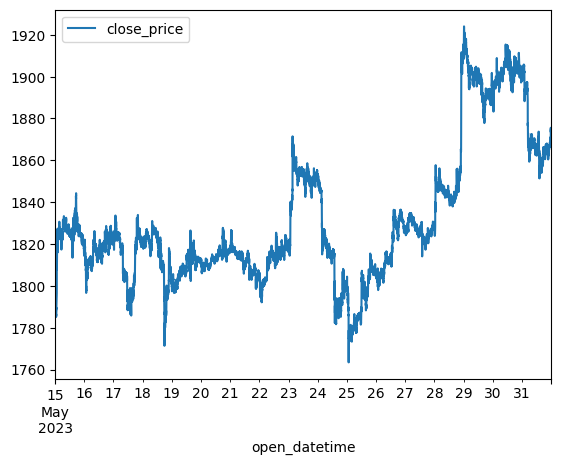

In [151]:
k_lines.plot.line(use_index=True)

In [152]:
k_lines_features = k_lines.copy()

k_lines_features["previous_close_price_mean_1_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(1).mean()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_mean_2_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(2).mean()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_mean_4_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(4).mean()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_mean_8_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(8).mean()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_mean_16_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(16).mean()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_std_2_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(2).std()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_std_4_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(4).std()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_std_8_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(8).std()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_std_16_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(16).std()
    / k_lines_features["close_price"]
)

k_lines_features["is_next_close_price_greater"] = (
    k_lines_features["close_price"]
    .shift(-1)
    .rolling(2)
    .apply(lambda x: x.iloc[1] > x.iloc[0])
)

k_lines_features.dropna(inplace=True)

display(k_lines_features)

,close_price,previous_close_price_mean_1_ratio,previous_close_price_mean_2_ratio,previous_close_price_mean_4_ratio,previous_close_price_mean_8_ratio,previous_close_price_mean_16_ratio,previous_close_price_std_2_ratio,previous_close_price_std_4_ratio,previous_close_price_std_8_ratio,previous_close_price_std_16_ratio,is_next_close_price_greater
open_datetime,,,,,,,,,,,
2023-05-15 00:16:00,1790.91,1.001402,1.002784,1.003463,1.003456,1.003853,0.001954,0.001426,0.000945,0.000815,1.0
2023-05-15 00:17:00,1791.63,0.999598,1.000299,1.002141,1.002625,1.003192,0.000991,0.002210,0.001545,0.001256,1.0
2023-05-15 00:18:00,1791.74,0.999939,0.999738,1.001028,1.002179,1.002884,0.000284,0.001876,0.001781,0.001467,1.0
2023-05-15 00:19:00,1792.55,0.999548,0.999517,0.999651,1.001319,1.002180,0.000043,0.000593,0.001869,0.001598,0.0
2023-05-15 00:20:00,1792.25,1.000167,0.999941,0.999697,1.001205,1.002111,0.000320,0.000375,0.001878,0.001624,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31 23:54:00,1873.18,1.000016,1.000096,1.000312,1.000352,0.999961,0.000113,0.000374,0.000310,0.000927,1.0
2023-05-31 23:55:00,1874.41,0.999344,0.999352,0.999441,0.999595,0.999408,0.000011,0.000104,0.000269,0.000821,0.0
2023-05-31 23:56:00,1872.80,1.000860,1.000531,1.000415,1.000505,1.000390,0.000464,0.000307,0.000305,0.000746,1.0


In [153]:
test_k_lines_ratio = .2
test_k_lines_count = round(test_k_lines_ratio * len(k_lines_features))

ml_test_dataset_size = 300

train_k_lines_features = k_lines_features.iloc[:-test_k_lines_count]
test_k_lines_features = k_lines_features.iloc[-test_k_lines_count:]

display(train_k_lines_features)
display(test_k_lines_features)

,close_price,previous_close_price_mean_1_ratio,previous_close_price_mean_2_ratio,previous_close_price_mean_4_ratio,previous_close_price_mean_8_ratio,previous_close_price_mean_16_ratio,previous_close_price_std_2_ratio,previous_close_price_std_4_ratio,previous_close_price_std_8_ratio,previous_close_price_std_16_ratio,is_next_close_price_greater
open_datetime,,,,,,,,,,,
2023-05-15 00:16:00,1790.91,1.001402,1.002784,1.003463,1.003456,1.003853,0.001954,0.001426,0.000945,0.000815,1.0
2023-05-15 00:17:00,1791.63,0.999598,1.000299,1.002141,1.002625,1.003192,0.000991,0.002210,0.001545,0.001256,1.0
2023-05-15 00:18:00,1791.74,0.999939,0.999738,1.001028,1.002179,1.002884,0.000284,0.001876,0.001781,0.001467,1.0
2023-05-15 00:19:00,1792.55,0.999548,0.999517,0.999651,1.001319,1.002180,0.000043,0.000593,0.001869,0.001598,0.0
2023-05-15 00:20:00,1792.25,1.000167,0.999941,0.999697,1.001205,1.002111,0.000320,0.000375,0.001878,0.001624,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-28 14:21:00,1840.60,1.000283,1.000312,1.000401,1.000569,1.000651,0.000042,0.000290,0.000285,0.000224,0.0
2023-05-28 14:22:00,1840.38,1.000120,1.000261,1.000481,1.000584,1.000728,0.000200,0.000341,0.000324,0.000277,1.0
2023-05-28 14:23:00,1840.78,0.999783,0.999842,1.000029,1.000247,1.000463,0.000085,0.000222,0.000343,0.000331,1.0


,close_price,previous_close_price_mean_1_ratio,previous_close_price_mean_2_ratio,previous_close_price_mean_4_ratio,previous_close_price_mean_8_ratio,previous_close_price_mean_16_ratio,previous_close_price_std_2_ratio,previous_close_price_std_4_ratio,previous_close_price_std_8_ratio,previous_close_price_std_16_ratio,is_next_close_price_greater
open_datetime,,,,,,,,,,,
2023-05-28 14:26:00,1840.59,1.000005,1.000101,1.000048,1.000207,1.000457,0.000134,0.000133,0.000294,0.000371,1.0
2023-05-28 14:27:00,1840.60,0.999995,0.999997,1.000071,1.000098,1.000399,0.000004,0.000093,0.000160,0.000372,0.0
2023-05-28 14:28:00,1839.29,1.000712,1.000710,1.000758,1.000768,1.001056,0.000004,0.000096,0.000128,0.000360,0.0
2023-05-28 14:29:00,1839.21,1.000043,1.000400,1.000576,1.000687,1.001006,0.000504,0.000355,0.000275,0.000427,0.0
2023-05-28 14:30:00,1839.03,1.000098,1.000120,1.000485,1.000691,1.001005,0.000031,0.000423,0.000364,0.000465,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31 23:54:00,1873.18,1.000016,1.000096,1.000312,1.000352,0.999961,0.000113,0.000374,0.000310,0.000927,1.0
2023-05-31 23:55:00,1874.41,0.999344,0.999352,0.999441,0.999595,0.999408,0.000011,0.000104,0.000269,0.000821,0.0
2023-05-31 23:56:00,1872.80,1.000860,1.000531,1.000415,1.000505,1.000390,0.000464,0.000307,0.000305,0.000746,1.0


In [154]:
from sklearn.ensemble import RandomForestClassifier

model_input_columns = [
    # "close_price",
    "previous_close_price_mean_1_ratio",
    "previous_close_price_mean_2_ratio",
    "previous_close_price_mean_4_ratio",
    "previous_close_price_mean_8_ratio",
    "previous_close_price_mean_16_ratio",
    "previous_close_price_std_2_ratio",
    "previous_close_price_std_4_ratio",
    "previous_close_price_std_8_ratio",
    "previous_close_price_std_16_ratio",
]
model_target_column = "is_next_close_price_greater"

model_train_input_values = train_k_lines_features[model_input_columns]
model_train_target_values = train_k_lines_features[model_target_column]
model_test_input_values = test_k_lines_features[model_input_columns]
model_test_target_values = test_k_lines_features[model_target_column]

model = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=1)
model.fit(model_train_input_values, model_train_target_values)

model_test_predicted_values = pd.Series(
    model.predict(model_test_input_values), index=test_k_lines_features.index
)
model_test_predicted_values.name = f"predicted_{model_target_column}"

model_test_target_and_predicted_values = pd.concat(
    [model_test_target_values, model_test_predicted_values], axis=1
)
display(model_test_target_and_predicted_values)

,is_next_close_price_greater,predicted_is_next_close_price_greater
open_datetime,,
2023-05-28 14:26:00,1.0,0.0
2023-05-28 14:27:00,0.0,1.0
2023-05-28 14:28:00,0.0,1.0
2023-05-28 14:29:00,0.0,1.0
2023-05-28 14:30:00,1.0,1.0
...,...,...
2023-05-31 23:54:00,1.0,0.0
2023-05-31 23:55:00,0.0,0.0
2023-05-31 23:56:00,1.0,0.0


In [155]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

display(
    "test_accuracy_score = "
    + str(accuracy_score(model_test_target_values, model_test_predicted_values))
)

# display(precision_score(model_test_target_values, model_test_predicted_values))
# display(recall_score(model_test_target_values, model_test_predicted_values))
# display(f1_score(model_test_target_values, model_test_predicted_values))

'test_accuracy_score = 0.5189045575311669'

In [156]:
display(
    pd.concat(
        [
            model_test_target_values.value_counts(),
            model_test_predicted_values.value_counts(),
        ],
        axis=1,
    )
)

,is_next_close_price_greater,predicted_is_next_close_price_greater
0.0,2463,3095
1.0,2430,1798
